# Constraints

[Try this yourself](https://colab.research.google.com/github/DTUWindEnergy/TopFarm2/blob/master/docs/notebooks/constraints.ipynb) (requires google account)


Constraints are the second key element of an optimization problem formulation and they ensure that the optimization results represent feasible/realistic solutions. There are three types of constraints in optimization:

- **Variable bounds**: upper and lower boundary values for design variables.
- **Inequality constraints**: constraint function values must be less or more than a given threshold.
- **Equality constraints**: constraint function must be exactly equal to a value (not as commonly used).

In TOPFARM, the two most common type of constraints are boundary (`XYBoundaryConstraint`) and spacing constraints (`SpacingConstraint`). The boundaries constraints restrict the wind farm within a defined region, where the turbines inside are not allowed to cross this boundary and any exclusion zone must be avoided. In addition, spacing constraints tell TOPFARM the minimum allowable inter-turbine spacing in the farm.

There is also the possibility of specifying additional constraints, such as fatigue loading or AEP. To do this, the **post_constraints** option in the TOPFARM problem is specified. More on how to set this up can be seen in the [load constrained layout optimization](https://topfarm.pages.windenergy.dtu.dk/TopFarm2/basic_examples_nblinks/layout_and_loads_nb.html) and [wake steering with load constraints](https://topfarm.pages.windenergy.dtu.dk/TopFarm2/advanced_examples_nblinks/wake_steering_and_loads_nb.html) examples.

This notebook walks through a process to set up typical constraints in TOPFARM for wind farm design problems. Before working through the two types of boundaries, you must first import some basic libraries and functions.

Make sure that you import or install topfarm on your newly created environment.

In [ ]:
# Install TopFarm if needed
import importlib
if not importlib.util.find_spec("topfarm"):
    !pip install git+https://gitlab.windenergy.dtu.dk/TOPFARM/TopFarm2.git

**Import supporting libraries in Python**

In [ ]:
# Import numpy and matplotlib files
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

**Next we import and initialize several functions and classes from TOPFARM to set up the problem including:**

- **TopFarmProblem**. Overall topfarm problem class to which the objectives, design variables, and constraints are added
- **XYPlotComp**. A helper function that shows the evolution of the optimization and the results at each iteration
- **XYBoundaryConstraint**. For a boundary specified as a series of connected perimeter vertices
- **CircleBoundaryConstraint**. For a circular boundary with a central location and a radius
- **SpacingConstraint**. For the inter-turbine spacing distance constraints
- **CostModelComponent**. A generic class for setting up a problem objective function


In [ ]:
# Import topfarm problem, plotting support, constraint classes and generic cost model component
from topfarm import TopFarmProblem
from topfarm.plotting import XYPlotComp
from topfarm.constraint_components.boundary import XYBoundaryConstraint, CircleBoundaryConstraint
from topfarm.constraint_components.spacing import SpacingConstraint
from topfarm.cost_models.cost_model_wrappers import CostModelComponent

## Boundary constraints

Next we are going to demonstrate the use of the `XYBoundaryConstraint` to set up site boundaries of a variety of types including square, rectangle and an arbitrary polygon.  Additionally, a "convex hull" example is provided which is a commonly used boundary type for wind farm design optimization problems.

**Convex hull**

"In mathematics, the convex hull or convex envelope or convex closure of a set X of points in the Euclidean plane or in a Euclidean space (or, more generally, in an affine space over the reals) is the smallest convex set that contains X. For instance, when X is a bounded subset of the plane, the convex hull may be visualized as the shape enclosed by a rubber band stretched around X." [[1]](https://en.wikipedia.org/wiki/Convex_hull)

In [ ]:
# set up a "boundary" array with arbitrary points for use in the example
boundary = np.array([(0, 0), (1, 1), (3, 0), (3, 2), (0, 2)])

# set up dummy design variables and cost model component. 
# This example includes 2 turbines (n_wt=2) located at x,y=0.5,0.5 and 1.5,1.5 respectively

x = [0.5,1.5]
y = [.5,1.5]
dummy_cost = CostModelComponent(input_keys=[],
                                n_wt=2,
                               cost_function=lambda : 1)   

# We introduce a simple plotting function so we can quickly plot different types of site boundaries
def plot_boundary(name, constraint_comp):
    tf = TopFarmProblem(
        design_vars={'x':x, 'y':y}, # setting up the turbine positions as design variables
        cost_comp=dummy_cost, # using dummy cost model
        constraints=[constraint_comp], # constraint set up for the boundary type provided
        plot_comp=XYPlotComp()) # support plotting function
    
    plt.figure()
    plt.title(name)
    tf.plot_comp.plot_constraints() # plot constraints is a helper function in topfarm to plot constraints
    plt.plot(boundary[:,0], boundary[:,1],'.r', label='Boundary points') # plot the boundary points
    plt.axis('equal')
    plt.legend() # add the legend


Now that we have set up our dummy problem, we can illustrate how different boundary types can be created from our boundary vertices. 

First we show a **convex hull** type as described above. Note that for the convex hull, all boundary points are contained within a convex perimeter but one of the boundary points on the interior is not used. When using the `XYBoundaryConstraint` in an optimization problem, TOPFARM uses convex hull as the default boundary type.

INFO: checking out_of_order
INFO: checking system
INFO: checking solvers
INFO: checking dup_inputs
INFO: checking missing_recorders
INFO: checking unserializable_options
INFO: checking comp_has_no_outputs
INFO: checking auto_ivc_warnings


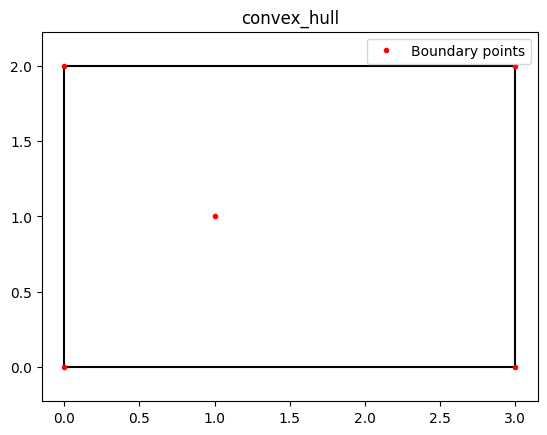

In [ ]:
plot_boundary('convex_hull', XYBoundaryConstraint(boundary, 'convex_hull'))

Next we show a **square** type of boundary. In this case the maximum distance between the x and y elements of the vertices is used to establish the perimeter.

INFO: checking out_of_order
INFO: checking system
INFO: checking solvers
INFO: checking dup_inputs
INFO: checking missing_recorders
INFO: checking unserializable_options
INFO: checking comp_has_no_outputs
INFO: checking auto_ivc_warnings


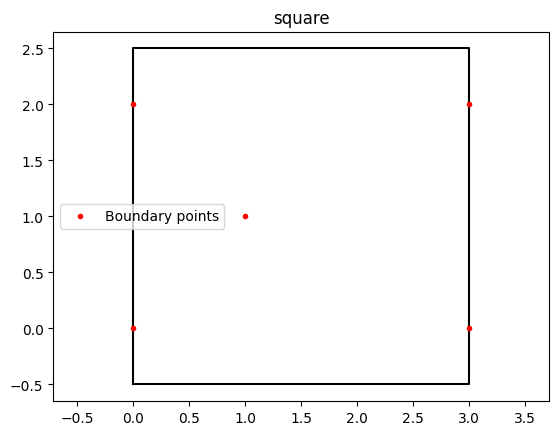

In [ ]:
plot_boundary('square', XYBoundaryConstraint(boundary, 'square'))

Now a **rectangle** boundary. Here we use the maximum distance on both x and y axes of the boundary coordinates to establish the perimeter.

INFO: checking out_of_order
INFO: checking system
INFO: checking solvers
INFO: checking dup_inputs
INFO: checking missing_recorders
INFO: checking unserializable_options
INFO: checking comp_has_no_outputs
INFO: checking auto_ivc_warnings


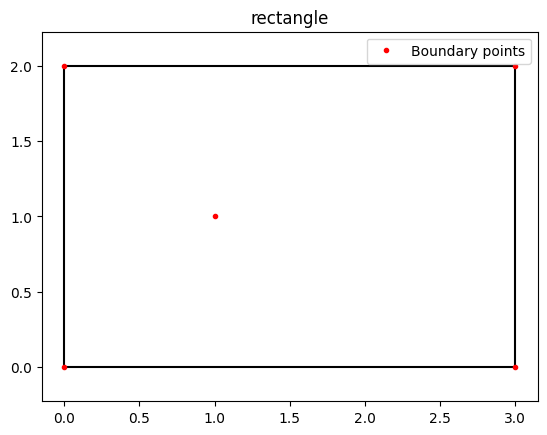

In [ ]:
plot_boundary('rectangle', XYBoundaryConstraint(boundary, 'rectangle'))

Now, a **polygon** boundary, which connects all the points in sequence. Note that this results in a nonconvex boundary. Nonconvex functions in optimization problems introduce complexity that can be challenging to handle and often require more sophisticated algorithms and higher computational expense.

INFO: checking out_of_order
INFO: checking system
INFO: checking solvers
INFO: checking dup_inputs
INFO: checking missing_recorders
INFO: checking unserializable_options
INFO: checking comp_has_no_outputs
INFO: checking auto_ivc_warnings


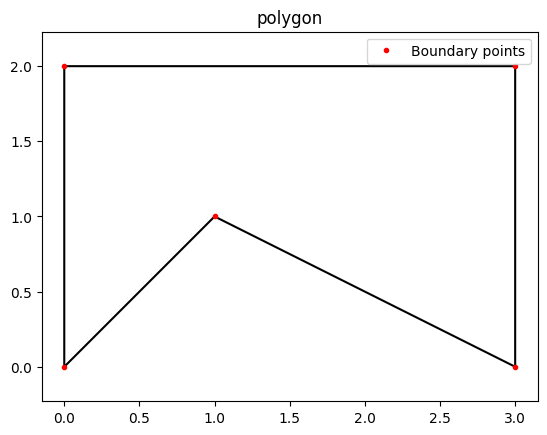

In [ ]:
plot_boundary('polygon', XYBoundaryConstraint(boundary, 'polygon'))

Finally, a **circular** boundary, where the midpoint of the circle and the radius are specified by the user. 

INFO: checking out_of_order
INFO: checking system
INFO: checking solvers
INFO: checking dup_inputs
INFO: checking missing_recorders
INFO: checking unserializable_options
INFO: checking comp_has_no_outputs
INFO: checking auto_ivc_warnings


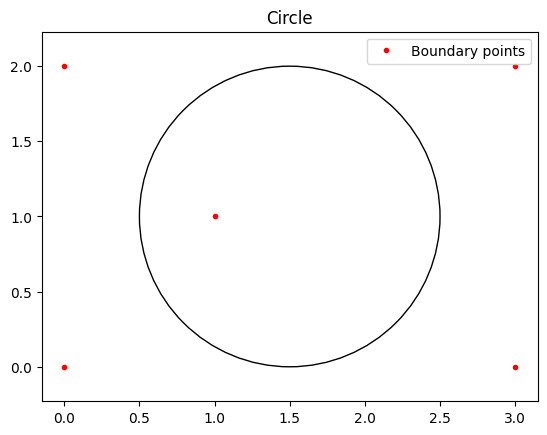

In [ ]:
plot_boundary('Circle',CircleBoundaryConstraint((1.5,1),1))

With a simple for loop we can quickly plot all boundary types

INFO: checking out_of_order
INFO: checking system
INFO: checking solvers
INFO: checking dup_inputs
INFO: checking missing_recorders
INFO: checking unserializable_options
INFO: checking comp_has_no_outputs
INFO: checking auto_ivc_warnings
INFO: checking out_of_order
INFO: checking system
INFO: checking solvers
INFO: checking dup_inputs
INFO: checking missing_recorders
INFO: checking unserializable_options
INFO: checking comp_has_no_outputs
INFO: checking auto_ivc_warnings
INFO: checking out_of_order
INFO: checking system
INFO: checking solvers
INFO: checking dup_inputs
INFO: checking missing_recorders
INFO: checking unserializable_options
INFO: checking comp_has_no_outputs
INFO: checking auto_ivc_warnings
INFO: checking out_of_order
INFO: checking system
INFO: checking solvers
INFO: checking dup_inputs
INFO: checking missing_recorders
INFO: checking unserializable_options
INFO: checking comp_has_no_outputs
INFO: checking auto_ivc_warnings


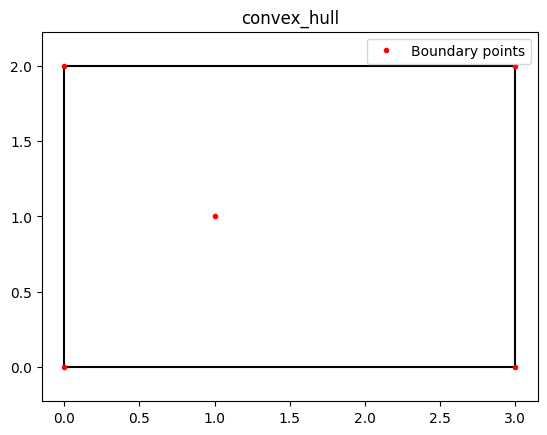

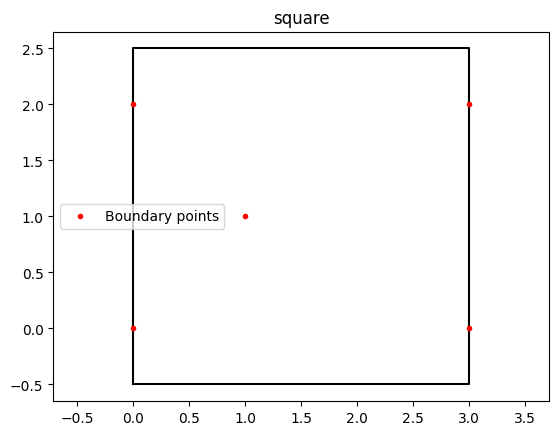

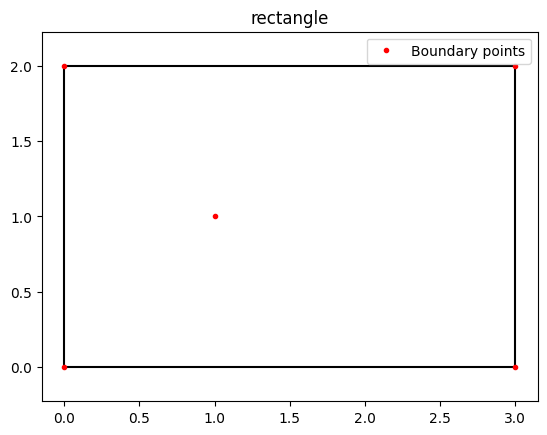

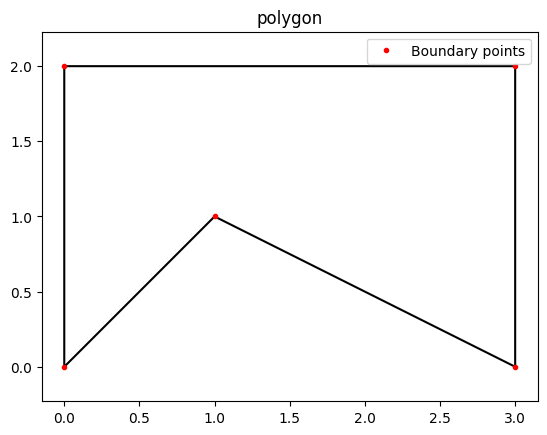

In [ ]:
for boundary_type in ['convex_hull','square','rectangle','polygon']:
    plot_boundary(boundary_type, XYBoundaryConstraint(boundary, boundary_type))


### Exercise 

Play around with a new set of boundary vertices and construct different perimeters to explore the functionality. See if you can make even more complex polygon shapes.

INFO: checking out_of_order
INFO: checking system
INFO: checking solvers
INFO: checking dup_inputs
INFO: checking missing_recorders
INFO: checking unserializable_options
INFO: checking comp_has_no_outputs
INFO: checking auto_ivc_warnings
INFO: checking out_of_order
INFO: checking system
INFO: checking solvers
INFO: checking dup_inputs
INFO: checking missing_recorders
INFO: checking unserializable_options
INFO: checking comp_has_no_outputs
INFO: checking auto_ivc_warnings
INFO: checking out_of_order
INFO: checking system
INFO: checking solvers
INFO: checking dup_inputs
INFO: checking missing_recorders
INFO: checking unserializable_options
INFO: checking comp_has_no_outputs
INFO: checking auto_ivc_warnings
INFO: checking out_of_order
INFO: checking system
INFO: checking solvers
INFO: checking dup_inputs
INFO: checking missing_recorders
INFO: checking unserializable_options
INFO: checking comp_has_no_outputs
INFO: checking auto_ivc_warnings


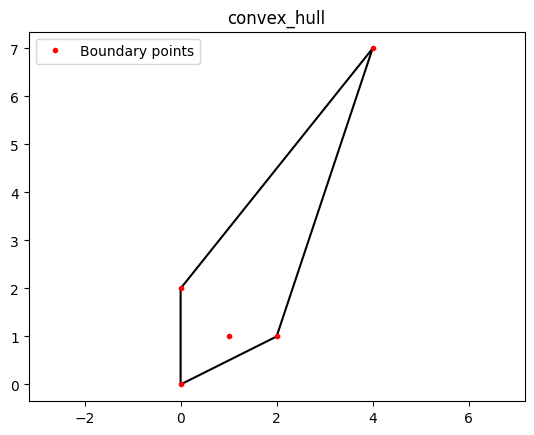

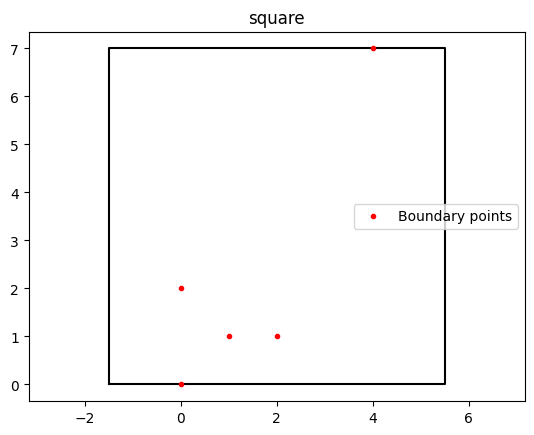

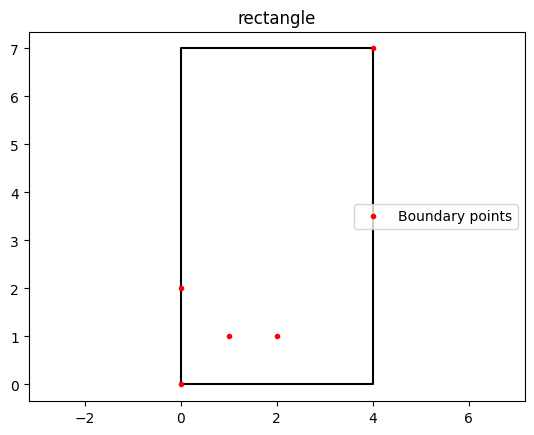

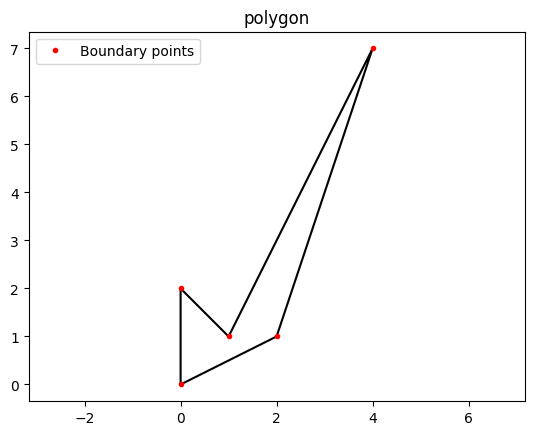

In [ ]:
# Make your own set of vertices - anything you would like!
boundary = np.array([(0, 0), (2, 1), (4, 7), (1, 1), (0, 2)])

# Then see what types of perimeters they generate
for boundary_type in ['convex_hull','square','rectangle','polygon']:
    plot_boundary(boundary_type, XYBoundaryConstraint(boundary, boundary_type))

## Spacing constraints

The next most common constraint in a wind farm design optimization problem is on the allowable inter-turbine spacing in the farm.  Instinctively, turbines will try to spread out within the wind farm to minimize wake losses, but a minimum constraint can also help to ensure that turbines not get placed too close together.

The following provides a simple example of implementation of a minimum spacing constraint.

In [ ]:
# set up dummy design variables and cost model component. 
# This example includes 2 turbines (n_wt=2) located at x,y=0.5,0.5 and 1.5,1.5 respectively

x = [0.5,1.5]
y = [.5,1.5]
dummy_cost = CostModelComponent(input_keys=[],
                                n_wt=2,
                               cost_function=lambda : 1)   

# a function to plot a spacing constraint for a Topfarm problem
def plot_spacing(name, constraint_comp):
    tf = TopFarmProblem(
        design_vars={'x':x, 'y':y}, # setting up the turbine positions as design variables
        cost_comp=dummy_cost, # using dummy cost model
        constraints=[constraint_comp], # constraint set up for the boundary type provided
        plot_comp=XYPlotComp()) # support plotting function
    tf.evaluate()
    
    plt.figure()
    plt.title(name)
    tf.plot_comp.plot_constraints() # plot constraints is a helper function in topfarm to plot constraints
    plt.plot(x,y,'.b', label='Wind turbines') # plot the turbine locations
    plt.axis('equal')
    plt.legend() # add the legend
    plt.ylim([0,3])    


To employ the spacing constraint, you must specify the minimum distance between turbines in meters.

INFO: checking out_of_order
INFO: checking system
INFO: checking solvers
INFO: checking dup_inputs
INFO: checking missing_recorders
INFO: checking unserializable_options
INFO: checking comp_has_no_outputs
INFO: checking auto_ivc_warnings
INFO: checking out_of_order
INFO: checking system
INFO: checking solvers
INFO: checking dup_inputs
INFO: checking missing_recorders
INFO: checking unserializable_options
INFO: checking comp_has_no_outputs
INFO: checking auto_ivc_warnings


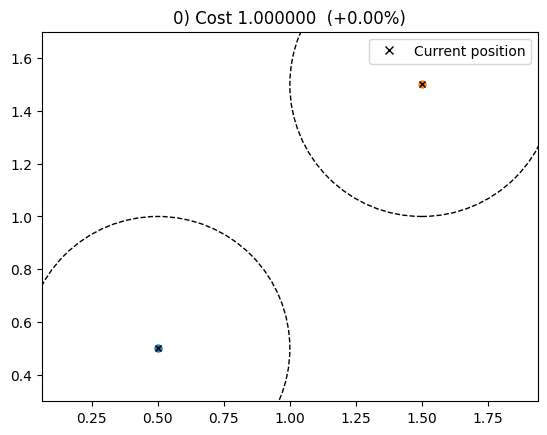

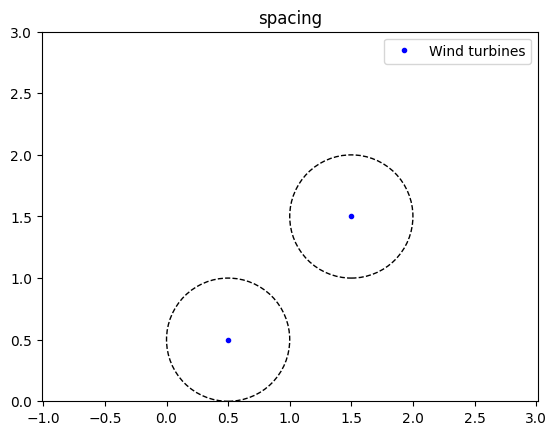

In [ ]:
plot_spacing('spacing', SpacingConstraint(1))

### Exercise

Play around with the spacing constraint size

INFO: checking out_of_order
INFO: checking system
INFO: checking solvers
INFO: checking dup_inputs
INFO: checking missing_recorders
INFO: checking unserializable_options
INFO: checking comp_has_no_outputs
INFO: checking auto_ivc_warnings
INFO: checking out_of_order
INFO: checking system
INFO: checking solvers
INFO: checking dup_inputs
INFO: checking missing_recorders
INFO: checking unserializable_options
INFO: checking comp_has_no_outputs
INFO: checking auto_ivc_warnings


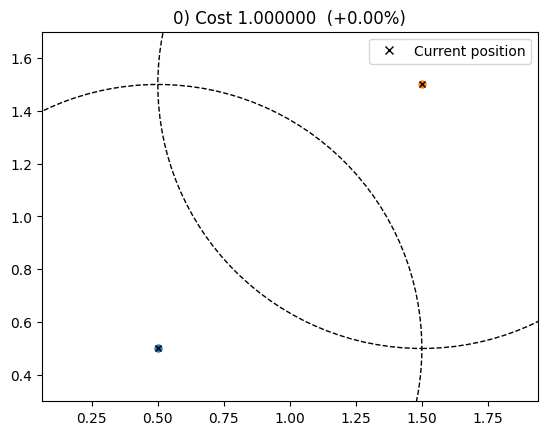

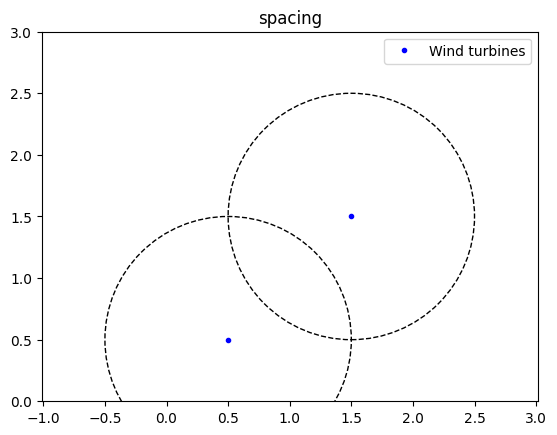

In [ ]:
plot_spacing('spacing', SpacingConstraint(2))